# ***IMAGE RECOGNITION USING CNN***

This project is basically implemented for image recognition by using cnn. CNN is nothing but the Convolution Neural Networks.Convolutional Neural Networks (CNN or ConvNet) is a subtype of Neural Networks that is mainly used for applications in image and speech recognition.In this project we will look into image recognition using CNN in CIFAR-10 Dataset. This CIFAR-10 dataset is imported from the datasets of keras.

This dataset includes a matching label so we know what kind of image of it is.In this dataset the image consists of 3232 pxs

In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D,MaxPooling2D
from pathlib import Path
from keras.utils.np_utils import to_categorical

after importing the libraries loading of the dataset will be done and training and test
x_tr=x train

x_te=x test

y_tr=y train

y_te=y test


In [ ]:
(x_tr,y_tr),(x_te,y_te)=cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


Normalization of dataset

The data type is changed into the float datatype of 32 bit and then normalized.

In [ ]:
x_tr=x_tr.astype('float32')
x_te=x_te.astype('float32')
x_tr/=255.0
x_te/=255.0

after normalization convert the class vectors to binary class matrices

In [ ]:
y_tr=to_categorical(y_tr,10)
y_te=to_categorical(y_te,10)

Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

Kernel: In image processing kernel is a convolution matrix or masks which can be used for blurring, sharpening, embossing, edge detection, and more by doing a convolution between a kernel and an image.

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

Compilation of the Model this is done by using (model.compile).

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                        

Fitting of data for the model.Here the data is fitted according to the size of batch. The training data of x,y are passed. Then validated data is passed by Test of x,y.

In [ ]:
model.fit(x_tr,y_tr,batch_size=32,epochs=8,validation_data=(x_te,y_te),shuffle=True)

Epoch 1/8
1563/1563 [==============================] - 243s 154ms/step - loss: 1.5755 - accuracy: 0.4213 - val_loss: 1.3111 - val_accuracy: 0.5367
Epoch 2/8
1563/1563 [==============================] - 228s 146ms/step - loss: 1.2134 - accuracy: 0.5670 - val_loss: 1.0337 - val_accuracy: 0.6341
Epoch 3/8
1563/1563 [==============================] - 229s 146ms/step - loss: 1.0799 - accuracy: 0.6170 - val_loss: 0.9407 - val_accuracy: 0.6692
Epoch 4/8
1563/1563 [==============================] - 230s 147ms/step - loss: 0.9893 - accuracy: 0.6497 - val_loss: 0.8599 - val_accuracy: 0.6978
Epoch 5/8
1563/1563 [==============================] - 228s 146ms/step - loss: 0.9250 - accuracy: 0.6734 - val_loss: 0.8497 - val_accuracy: 0.7022
Epoch 6/8
1563/1563 [==============================] - 229s 147ms/step - loss: 0.8787 - accuracy: 0.6909 - val_loss: 0.8400 - val_accuracy: 0.7100
Epoch 7/8
1563/1563 [==============================] - 228s 146ms/step - loss: 0.8434 - accuracy: 0.7024 - val_loss: 0

Saving the neural network architecture.here the data in transformed into json,then that is written by the model_structure.

In [ ]:
model_structure=model.to_json()
f=Path("model_structure.json")
f.write_text(model_structure)

4384

The saved format in json. we will also save the trained neural weights for predictions.

In [ ]:
model.save_weights("model_weight.h5")

Here the main part will come into the picture.The predictions will be made on the images based on the labels on them.

In [ ]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

class_labels are defined accordingly the division is made based on the labels of the class.

for example, like horse,dog etc..,

In [ ]:
class_labels=["Planes","Car","Bird","Cat","Deer","Dog","Frog",
              "Horse","Boat","Truck"]

Loading of the json file that contains the model structure which we have loaded after fitting of the model is done.

write_text for writing the data into the json file.

read_text for reading the data from the json file.

In [ ]:
f=Path("model_structure.json")
model_Structure=f.read_text()

Loading of the image is done for testing. (load_img is used for loading the image) size is used as (32,32) as while creating the model the size given is (32,32)

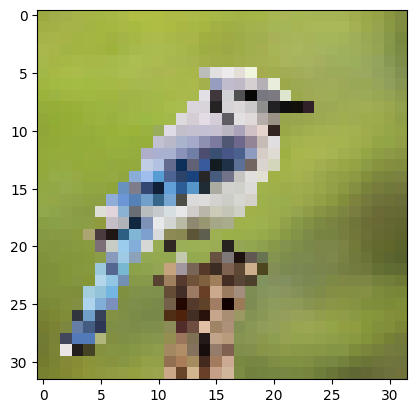

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img,img_to_array
img=load_img("/content/bird.jpeg",target_size=(32,32))
plt.imshow(img)

After loading an image into a variable we have to convert the image to numpy array.here the image is converted to array and then expand according to dimensions of the array according to the row. (img_to_array is used for conversion)

In [ ]:
from tensorflow.keras.utils import img_to_array
imgtest=img_to_array(img)
list_of_image=np.expand_dims(imgtest,axis=0)

After converting into the array.Then predictions are made on the basis of the array.

In [ ]:
res=model.predict(list_of_image)

1/1 [==============================] - 0s 25ms/step


only one result is taken into consideration as only one image is taken.if there are group of images then loop will be runned or the data set is classified accordingly.Printing of the array for all the labels will be done.

In [ ]:
sr=res[0]
print(sr)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


we will get a score which represents for the likelihood of all 10 possible classes.when it gets the highest likelihood score then that label is given to that image. And the image label will be printed as a result.

In [ ]:
mostlci=int(np.argmax(sr))
clh=class_labels[mostlci]
print(clh,mostlci)

Bird 2
